# 1. Data Acquisition
1.1 import Basic Libraries

1.2 Load the datasets

In [ ]:
# import Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import string
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import Word
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud


import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
upload = files.upload()

Saving hotel_reviews.xlsx to hotel_reviews.xlsx


In [ ]:
reviews=pd.read_excel('hotel_reviews.xlsx')

# 2. Exploratory Data Analysis (EDA)
2.1 Data Exploration

2.2 Checking duplicates & null values

2.3 Removing Unwanted features

After examining "@", we came to the conclusion that this columns is not useful in our Modelling. We will drop those column.
2.4 Checking the data with different aspects before preprocessing it.

In [ ]:
reviews = pd.read_excel("hotel_reviews.xlsx")
reviews.drop(columns={'@'},inplace=True)
print("the shape of this dataset is :",reviews.shape)
reviews.sample(5)

the shape of this dataset is : (20491, 2)


,Review,Rating
19629,fantastic hotel did lot research online lookin...,5
15232,"wonderful hotel fantastic hotel, huge room hug...",5
5865,"best stayed, staff location rooms ambience jus...",5
3887,natura park resort just ok fiance stayed natur...,2
18733,idyllic hotel residence michelangiolo wonderfu...,5


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [ ]:
reviews.duplicated().sum()

0

In [ ]:
reviews.nunique()

Review    20491
Rating        5
dtype: int64

In [ ]:
reviews["Rating"].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

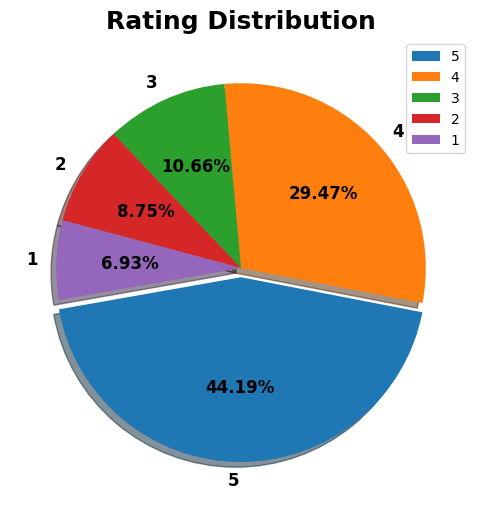

In [ ]:
#plotting the ratings
plt.figure(figsize = (10,6))
plt.pie(reviews['Rating'].value_counts(),
       labels=reviews['Rating'].value_counts().index,
       explode = [0.05, 0, 0, 0, 0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large','fontweight':'bold',
                    'rotation':'horizontal','color':'black'})
plt.legend(loc= 'upper right')
plt.title("Rating Distribution", fontsize = 18, fontweight = 'bold')
plt.show()

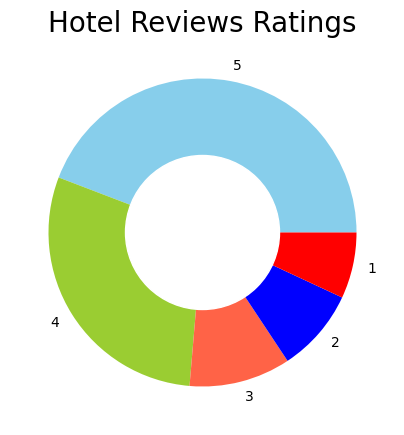

In [ ]:
ratings = reviews["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Hotel Reviews Ratings", fontsize=20)
plt.show()

> The data contains more number of 5,4 Ratings compared to 2 and 1

In [ ]:
import plotly.express as px
reviews['text_length'] = reviews.Review.str.len()

fig = px.histogram(reviews,
                   x='text_length',
                   color='Rating',
                   color_discrete_sequence=["#B6E880", "#FFA15A", "#FECB52", "#00CC96", "#EF553B"],
                   title="Review Length Distributions"
                  )

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    margin=dict(l=0,r=0,b=0)
)

fig.show()

In [ ]:
# to check how many no. of words and no .of characters are there
reviews["word_count"] = reviews["Review"].apply(lambda x: len(str(x).split(" ")))
reviews[["Review","word_count"]].sample(5)

,Review,word_count
14227,not bad reviews read pleasantly surprised reso...,82
812,charming french quarter hotel nicest feature p...,120
8839,desperate need updating stayed 1 night busines...,79
10278,nice hotel sofitel nice hotel centrally locate...,40
4287,"convenient location, tiny room, just weekend w...",126


Pearson Correlation Coefficient: -0.09067472401967694
P-value: 1.1340532675779055e-38


Text(0, 0.5, 'Rating')

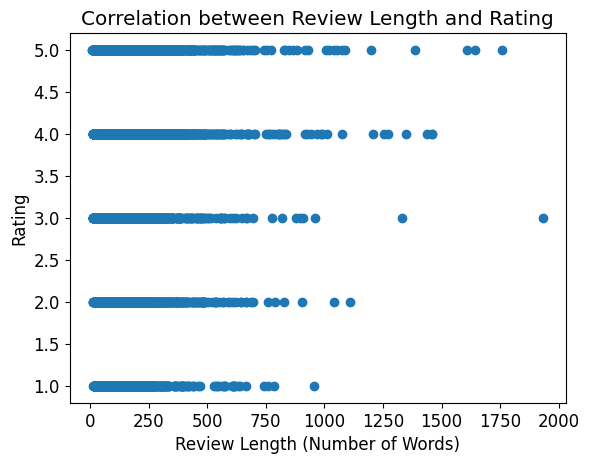

In [ ]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(reviews['word_count'], reviews['Rating'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

plt.scatter(reviews['word_count'], reviews['Rating'])
plt.title("Correlation between Review Length and Rating")
plt.xlabel("Review Length (Number of Words)")
plt.ylabel("Rating")

> The correlation coefficient is relatively small (-0.0901), which means that the relationship between review length and rating is not very strong. This means that there is a lot of variation in the data, and that many longer reviews still have low ratings, and many shorter reviews still have high ratings.

In [ ]:
# average word per sentences
def avg_word(sentences):
    words = str(sentences).split()
    return (sum(len(word) for word in words)/ len(words))

reviews["avg_words"] = reviews["Review"].apply(lambda x: avg_word(x))
reviews[["Review","avg_words"]].head()

,Review,avg_words
0,nice hotel expensive parking got good deal sta...,5.804598
1,ok nothing special charge diamond member hilto...,5.752000
2,nice rooms not 4* experience hotel monaco seat...,5.571429
3,"unique, great stay, wonderful time hotel monac...",5.730337
4,"great stay great stay, went seahawk game aweso...",5.701571


In [ ]:
# find the special characters using regular exp. module
import re

def spl_char(sentences):
  spl_char_letter = re.compile(r'[^a-zA-Z\s]')
  words = spl_char_letter.findall(sentences)
  return len(words)

reviews['spl_char'] = reviews['Review'].apply(lambda x: spl_char(x))
reviews[['Review','spl_char']].head()

,Review,spl_char
0,nice hotel expensive parking got good deal sta...,14
1,ok nothing special charge diamond member hilto...,39
2,nice rooms not 4* experience hotel monaco seat...,56
3,"unique, great stay, wonderful time hotel monac...",17
4,"great stay great stay, went seahawk game aweso...",42


In [ ]:
d1=reviews.copy()

# Ensuring 'Review' column is in string format
d1['Review'] = d1['Review'].astype(str)

# Filter rows that contain ".com"
pattern_matches = d1[d1['Review'].str.contains(r'\b\w+\.com\b')]

# Print the result
print(pattern_matches['Review'])

204      posh hotel husband stayed hilton seattle septe...
336      airport quality westin downtown price stayed w...
394      great atmosphere stay w seattle football games...
498      great airport hotel prepaid rate hilton.com 84...
506      nice hotel minor issues travelling friend stay...
                               ...                        
20098    sick breezes stayed breezes resort punta cana ...
20111    concerns not warranted breezes 25 years old ju...
20234    nice place heart entertainment disctrict just ...
20323    terrible service called hotel change reservati...
20431    perfect birthday getaway boyfriend surprised b...
Name: Review, Length: 293, dtype: object


In [ ]:
# Assuming pattern_matches is the DataFrame with rows containing ".com"
all_names = []

for index, row in pattern_matches.iterrows():
    review_text = row['Review']
    words_with_com = re.findall(r'\b\w+\.com\b', review_text)
    if words_with_com:
        all_names.extend(words_with_com)

# List of email service names to be excluded
email_services = [
    'yahoo.com', 'gmail.com', 'aol.com', 'hotmail.com', 'msn.com', 'mac.com', 'rr.com', 'netcom.com', 'excite.com',
    'rogers.com', 'canada.com', 'wmconnect.com', 'ntlworld.com', 'milwpc.com', 'weather.com']

# Filter out email service names from all_names
filtered_names = [name for name in all_names if name not in email_services]

filtered = list(filtered_names)
filtered

['hotwire.com',
 'priceline.com',
 'sneakysunday.com',
 'hilton.com',
 'hiexpress.com',
 'bookit.com',
 'minute.com',
 'hotel.com',
 'hotel.com',
 'fairmont.com',
 'bookit.com',
 'flickr.com',
 'hotels.com',
 'venere.com',
 'hotels.com',
 'tripadvisor.com',
 'tripadvisor.com',
 'otel.com',
 'hotwire.com',
 'tripadvisor.com',
 'tripadvisor.com',
 'tripadvisor.com',
 'hotels.com',
 'hotels.com',
 'advisor.com',
 'hotels.com',
 'hotels.com',
 'travelocity.com',
 'hotels.com',
 'veryveggie.com',
 'priceline.com',
 'cheapcaribbean.com',
 'clusters.com',
 'selloffvacations.com',
 'solmelia.com',
 'tripadvisor.com',
 'solmelia.com',
 'vacationkids.com',
 'priceline.com',
 'hotels.com',
 'intecontinental.com',
 'acampapr.com',
 'baravorunners.com',
 'cheepoair.com',
 'hotelmilanopr.com',
 'tripadvisor.com',
 'booking.com',
 'expedia.com',
 'hotels.com',
 '1800hotels.com',
 'hrs.com',
 'hotelsclick.com',
 'roomsnet.com',
 'otel.com',
 'hotel.com',
 'hotelsrus.com',
 'hotels.com',
 'tripadvisor.

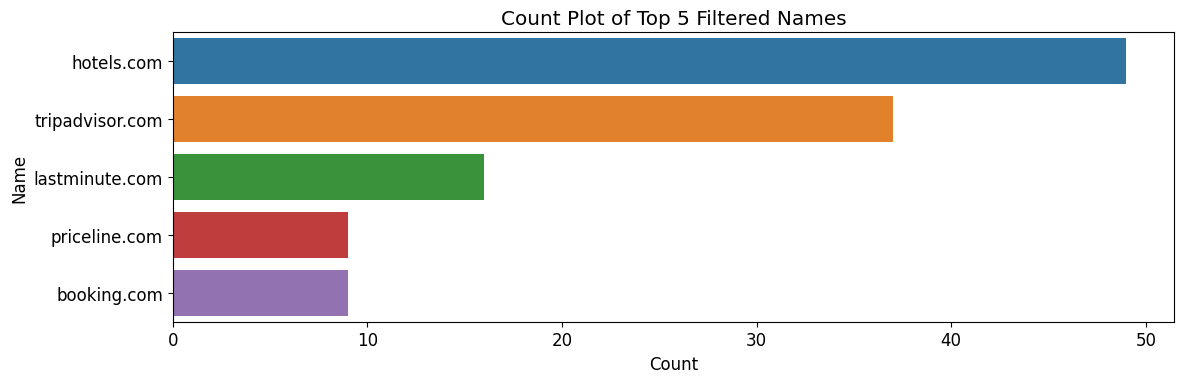

In [ ]:
name_counts = pd.Series(filtered).value_counts()

top_5_names = name_counts.head(5).index

# Filter only the top 5 names
filtered_names_top_5 = [name for name in filtered_names if name in top_5_names]

plt.figure(figsize=(12, 4))
sns.countplot(y=filtered_names_top_5, order=pd.Series(filtered_names_top_5).value_counts().index)

plt.title('Count Plot of Top 5 Filtered Names')
plt.xlabel('Count')
plt.ylabel('Name')
plt.tight_layout()
plt.show()

> These are the top 5 domains associated with the websites that provide hotel booking services.

In [ ]:
# find the punctuations using string modules
import re
import string

def count_punct(sentence):
  punct_chars = string.punctuation
  punct_letter = re.compile(f'[{re.escape(punct_chars)}]')
  punctuations = punct_letter.findall(sentence)
  return len(punctuations)

reviews['punctuations'] = reviews['Review'].apply(lambda x: count_punct(x))
reviews[['Review','punctuations']].head()

,Review,punctuations
0,nice hotel expensive parking got good deal sta...,12
1,ok nothing special charge diamond member hilto...,26
2,nice rooms not 4* experience hotel monaco seat...,32
3,"unique, great stay, wonderful time hotel monac...",16
4,"great stay great stay, went seahawk game aweso...",40


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
stop.discard('not')  # Remove 'not' from the stopwords set
stop.update(['hotel', 'room'])  # Add 'hotel' and 'room' to the stopwords set

reviews['Review'] = reviews['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# no. of links attached to the review
reviews["Review"].str.contains('https://').value_counts()

False    20491
Name: Review, dtype: int64

In [ ]:
reviews["Review"].str.contains("www.").value_counts()

False    20459
True        32
Name: Review, dtype: int64

In [ ]:
reviews["Review"].str.contains(".com").value_counts()

True     14234
False     6257
Name: Review, dtype: int64

In [ ]:
reviews["Review"].str.contains("it__Ç_é_").value_counts()

False    20303
True       188
Name: Review, dtype: int64

In [ ]:
reviews["Review"].str.contains("__Ç_éÈe").value_counts()    # review index 1045

False    20404
True        87
Name: Review, dtype: int64

In [ ]:
# no. of usertags
reviews["Review"].str.contains('@').value_counts()

False    20491
Name: Review, dtype: int64

In [ ]:
# no. of hashtags
reviews["Review"].str.contains('#').value_counts()

False    20491
Name: Review, dtype: int64

In [ ]:
reviews.head()

,Review,Rating,text_length,word_count,avg_words,spl_char,punctuations
0,nice expensive parking got good deal stay anni...,4,593,89,5.804598,14,12
1,ok nothing special charge diamond member hilto...,2,1689,252,5.752000,39,26
2,nice rooms not 4* experience monaco seattle go...,3,1427,219,5.571429,56,32
3,"unique, great stay, wonderful time monaco, loc...",5,600,91,5.730337,17,16
4,"great stay great stay, went seahawk game aweso...",5,1281,193,5.701571,42,40


In [ ]:
# Spelling correction
import spacy
nlp = spacy.load('en_core_web_sm')

reviews['Review'][:5].apply(lambda x: str(nlp(x)))

0    nice expensive parking got good deal stay anni...
1    ok nothing special charge diamond member hilto...
2    nice rooms not 4* experience monaco seattle go...
3    unique, great stay, wonderful time monaco, loc...
4    great stay great stay, went seahawk game aweso...
Name: Review, dtype: object

In [ ]:
reviews.drop(["text_length","word_count","avg_words","spl_char","punctuations"], inplace=True, axis=1)

In [ ]:
reviews.head()

,Review,Rating
0,nice expensive parking got good deal stay anni...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience monaco seattle go...,3
3,"unique, great stay, wonderful time monaco, loc...",5
4,"great stay great stay, went seahawk game aweso...",5


# 3. Text-PreProcessing
3.1 Cleaning data

There are a number of special characters and other values that needs to be removed. We will define a clean text function to remove it.
This function will convert all text to lower case
3.2 Removing Emojis

certain useless emojis will be added to data which should be removed custom emojis list.
3.3 Chat words abbrevation replacements

Short forms like IDK, WTF, FYI etc will be replaced with their abbrevations.
3.4 Tokenization

To breaks text into smaller parts for easier to remove stopwords, doing Stemming & Lemmatization.
3.6 Spell Checker

to check every spelling and correct it if it is wrong
3.7 StopWords

to eliminate words that are so widely used that they carry very little useful information.
3.8 Stemming

reducing a word to its word stem that suffixes or the roots
3.9 Lemmatization

lemmatization is to reduce a word to its root form

In [ ]:
# Data Pre-Processing
df = reviews[["Review"]]
df.head()

,Review
0,nice expensive parking got good deal stay anni...
1,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience monaco seattle go...
3,"unique, great stay, wonderful time monaco, loc..."
4,"great stay great stay, went seahawk game aweso..."


In [ ]:
# convert to lower case and removing punctuations,lowercase, remove text in square brackets,remove links,remove punctuation and remove words containing numbers.
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    #text = re.sub('[^a-z]', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://*', '', text)
    text = re.sub("\www.*", "", text)
    text = re.sub("\.com*", "", text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df["Clean_Reviews"] = df["Review"].apply(lambda x: clean_text(x))
df.head()

,Review,Clean_Reviews
0,nice expensive parking got good deal stay anni...,nice expensive parking got good deal stay anni...
1,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience monaco seattle go...,nice rooms not experience monaco seattle good...
3,"unique, great stay, wonderful time monaco, loc...",unique great stay wonderful time monaco locati...
4,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...


In [ ]:
lower_words = [text.lower() for text in df.Clean_Reviews]
print(lower_words[0:50])

['nice expensive parking got good deal stay anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed nonexistent view clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay  parking night', 'ok nothing special charge diamond member hilton decided chain shot  anniversary seattle start booked suite paid extra website description not suite bedroom bathroom standard room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting bathroom bedroom unlike kimpton calls suite  day stay offer correct false advertising send kimpton pref

In [ ]:
# # Removing emojis
# def remove_emoji(text):
#     emoji_pattern = re.compile("["
#                            u"\U0001F600-\U0001F64F"  # emoticons
#                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            u"\U00002702-\U000027B0"
#                            u"\U000024C2-\U0001F251"
#                            "]+", flags=re.UNICODE)
#     return emoji_pattern.sub(r'', text)

In [ ]:
# df["Clean_Reviews"] = df["Clean_Reviews"].apply(lambda x: remove_emoji(x))
# df.head()

In [ ]:
# Handling Chat word
'''
IDK = I Dont Know
ASAP = as soon as possible
FYI = For Your Information
FIMH = Forever in my heart
'''
chat_words = {  "AFAIK": "As Far As I Know", "AFK": "Away From Keyboard",
                "ASAP": "As Soon As Possible", "ATK":"At The Keyboard",
                "ATM": "At The Moment", "A3": "Anytime, Anywhere, Anyplace",
                "BAK": "Back At Keyboard" ,"BBL": "Be Back Later",
                "BBS":"Be Back Soon", "BFN":"Bye For Now",
                "B4N":"Bye For Now", "BRB":"Be Right Back",
                "BRT":"Be Right There", "BTW":"By The Way",
                "B4":"Before", "B4N":"Bye For Now",
                "CU":"See You", "CUL8R":"See You Later",
                "CYA":"See You", "FAQ":"Frequently Asked Questions",
                "FC":"Fingers Crossed", "FWIW":"For What It's Worth",
                "FYI":"For Your Information", "GAL":"Get A Life",
                "GG":"Good Game", "GN":"Good Night",
                "GMTA":"Great Minds Think Alike", "GR8":"Great",
                "G9":"Genius", "IC":"I See",
                "ICQ":"I Seek you", "ILU": "I Love You",
                "IMHO":"In My Honest Humble Opinion", "IMO":"In My Opinion",
                "IOW":"In Other Words" ,"IRL":"In Real Life",
                "KISS":"Keep It Simple Stupid", "LDR":"Long Distance Relationship",
                "LMAO":"Laugh My Ass Off", "LOL":"Laughing Out Loud",
                "LTNS":"Long Time No See", "L8R":"Later",
                "MTE":"My Thoughts Exactly", "M8":"Mate",
                "NRN":"No Reply Necessary",  "OIC":"Oh I See",
                "PITA":"Pain In The Ass", "PRT":"Party",
                "PRW":"Parents Are Watching", "ROFL":"Rolling On The Floor Laughing",
                "ROFLOL":"Rolling On The Floor Laughing Out Loud", "ROTFLMAO":"Rolling On The Floor Laughing My Ass Off",
                "SK8":"Skate", 'STATS':'Your sex and age',
                "ASL":"Age Sex Location",  "THNX":"Thank You",
                "TTFN":"TaTa For Now", "TTYL":"Talk To You Later",
                "U":"You", "U2":"You Too",
                "U4E":"Yours For Ever", "WB":"Welcome Back",
                "WTF":"What The Fuck", "WTG":"Way To Go",
                "WUF":"Where Are You From",  "W8":"Wait",
                "7K":"Sick Laughter",  "TFW" : "That feeling when",
                "MFW" : "My face when", "MRW" : "My reaction when",
                "IFYP" : "I feel your pain", "LOL" : "Laughing out loud",
                "TNTL" : "Trying not to laugh", "JK" : "Just kidding",
                "IDC" : "I dont care", "ILY" : "I love you",
                "IMU" : "I miss you", "ADIH" : "Another day in hell",
                "IDC" : "I dont care" ,"ZZZ" : "Sleeping bored tired",
                "WYWH" : "Wish you were here", "TIME" : "Tears in my eyes",
                "BAE" : "Before anyone else", "FIMH" : "Forever in my heart",
                "BSAAW" : "Big smile and a wink", "BWL" : "Bursting with laughter",
                "LMAO" : "Laughing my ass off", "BFF": "Best friends forever",
                "CSL" : "Cant stop laughing"}


chat_words_dict = pd.DataFrame.from_dict(chat_words, orient="index",columns=['full_form'])
chat_words_dict['short_form'] = chat_words_dict.index
chat_words = chat_words_dict.reset_index()
chat_words.drop(["index"], inplace=True, axis=1)

In [ ]:
chat_words.head()

,full_form,short_form
0,As Far As I Know,AFAIK
1,Away From Keyboard,AFK
2,As Soon As Possible,ASAP
3,At The Keyboard,ATK
4,At The Moment,ATM


In [ ]:
def chat_conversion(text):
  new_text=[]
  for words in text.split():
    if words.upper() in chat_words['short_form']:
      new_text.append(chat_words[words["full_form"]])
    else:
      new_text.append(words)
  return " ".join(new_text)

In [ ]:
df["Clean_Reviews"] = df["Clean_Reviews"].apply(lambda x: chat_conversion(x))
df.head()

,Review,Clean_Reviews
0,nice expensive parking got good deal stay anni...,nice expensive parking got good deal stay anni...
1,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience monaco seattle go...,nice rooms not experience monaco seattle good ...
3,"unique, great stay, wonderful time monaco, loc...",unique great stay wonderful time monaco locati...
4,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...


In [ ]:
review = [text.strip() for text in df.Clean_Reviews] # remove both the leading and the trailing characters
review = [text for text in review if text] # removes empty strings, because they are considered in Python as False
review[:2]

['nice expensive parking got good deal stay anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed nonexistent view clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay parking night',
 'ok nothing special charge diamond member hilton decided chain shot anniversary seattle start booked suite paid extra website description not suite bedroom bathroom standard room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting bathroom bedroom unlike kimpton calls suite day stay offer correct false advertising send kimpton prefer

In [ ]:
# Joining the list into one string/text
review_text = ' '.join(review)
print(len(review_text))
print(review_text[0:150])

13637856
nice expensive parking got good deal stay anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappoi


In [ ]:
# Tokenization
nltk.download('punkt')
import nltk

from nltk.tokenize import word_tokenize
review_tokens = word_tokenize(review_text)
print(review_tokens[0:50])

# for Clean_Reviews Column
df['Clean_Reviews'] = df['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
df.head(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['nice', 'expensive', 'parking', 'got', 'good', 'deal', 'stay', 'anniversary', 'arrived', 'late', 'evening', 'took', 'advice', 'previous', 'reviews', 'valet', 'parking', 'check', 'quick', 'easy', 'little', 'disappointed', 'nonexistent', 'view', 'clean', 'nice', 'size', 'bed', 'comfortable', 'woke', 'stiff', 'neck', 'high', 'pillows', 'not', 'soundproof', 'like', 'heard', 'music', 'night', 'morning', 'loud', 'bangs', 'doors', 'opening', 'closing', 'hear', 'people', 'talking', 'hallway']


,Review,Clean_Reviews
0,nice expensive parking got good deal stay anni...,"[nice, expensive, parking, got, good, deal, st..."
1,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience monaco seattle go...,"[nice, rooms, not, experience, monaco, seattle..."
3,"unique, great stay, wonderful time monaco, loc...","[unique, great, stay, wonderful, time, monaco,..."
4,"great stay great stay, went seahawk game aweso...","[great, stay, great, stay, went, seahawk, game..."


In [ ]:
nltk.download('stopwords')

from nltk.corpus import stopwords

# # For wordCloud
# my_stop_words = stopwords.words('english')
# sw_list = ['\x92','rt','ye','yeah','haha','Yes','__Ç_éÈe','I','__Ç','__Ç_é_',"br/", "hotel", "room"]     # index 1044 emojis
# my_stop_words.extend(sw_list)

# no_stop_tokens = [word for word in review_tokens if not word in my_stop_words]

# For Clean_Reviews Column
my_stop_words=stopwords.words('english')
my_stop_words.remove('not')
sw_list = ['\x92','rt','ye','yeah','haha','Yes','__Ç_éÈe','I','__Ç','__Ç_é_',"br/","hotel","room"]     # index 1044 emojis
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in df.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Reviews if not word in stopwords_set and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(words_without_stopwords)

df['Clean_Reviews'] = cleaned_tweets
df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,Clean_Reviews
0,nice expensive parking got good deal stay anni...,"[nice, expensive, parking, got, good, deal, st..."
1,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience monaco seattle go...,"[nice, rooms, not, experience, monaco, seattle..."
3,"unique, great stay, wonderful time monaco, loc...","[unique, great, stay, wonderful, time, monaco,..."
4,"great stay great stay, went seahawk game aweso...","[great, stay, great, stay, went, seahawk, game..."
5,love monaco staff husband stayed crazy weekend...,"[love, monaco, staff, husband, stayed, crazy, ..."
6,"cozy stay rainy city, husband spent 7 nights m...","[cozy, stay, rainy, city, husband, spent, nigh..."
7,"excellent staff, housekeeping quality chocked ...","[excellent, staff, housekeeping, quality, choc..."
8,"stayed monaco cruise, rooms generous decorated...","[stayed, monaco, cruise, rooms, generous, deco..."
9,"excellent stayed monaco past w/e delight, rece...","[excellent, stayed, monaco, past, delight, rec..."


In [ ]:
# Stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()

# stemmed_tokens=[ps.stem(word) for word in df.Clean_Reviews]
# creating other Column
df['stemmed'] = df['Clean_Reviews'].apply(lambda x: " ".join([ps.stem(word) for word in x]))
df.head()

,Review,Clean_Reviews,stemmed
0,nice expensive parking got good deal stay anni...,"[nice, expensive, parking, got, good, deal, st...",nice expens park got good deal stay anniversar...
1,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...",ok noth special charg diamond member hilton de...
2,nice rooms not 4* experience monaco seattle go...,"[nice, rooms, not, experience, monaco, seattle...",nice room not experi monaco seattl good nt lev...
3,"unique, great stay, wonderful time monaco, loc...","[unique, great, stay, wonderful, time, monaco,...",uniqu great stay wonder time monaco locat exce...
4,"great stay great stay, went seahawk game aweso...","[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...


In [ ]:
# Lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Create an instance of WordNetLemmatizer
wnl = WordNetLemmatizer()

lemma_words=[wnl.lemmatize(word) for word in lower_words]
print(lemma_words[:50])

df['lemmas'] = df['Clean_Reviews'].apply(lambda x: " ".join([wnl.lemmatize(word) for word in x]))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


['nice expensive parking got good deal stay anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed nonexistent view clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay  parking night', 'ok nothing special charge diamond member hilton decided chain shot  anniversary seattle start booked suite paid extra website description not suite bedroom bathroom standard room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting bathroom bedroom unlike kimpton calls suite  day stay offer correct false advertising send kimpton pref

,Review,Clean_Reviews,stemmed,lemmas
0,nice expensive parking got good deal stay anni...,"[nice, expensive, parking, got, good, deal, st...",nice expens park got good deal stay anniversar...,nice expensive parking got good deal stay anni...
1,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...",ok noth special charg diamond member hilton de...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience monaco seattle go...,"[nice, rooms, not, experience, monaco, seattle...",nice room not experi monaco seattl good nt lev...,nice room not experience monaco seattle good n...
3,"unique, great stay, wonderful time monaco, loc...","[unique, great, stay, wonderful, time, monaco,...",uniqu great stay wonder time monaco locat exce...,unique great stay wonderful time monaco locati...
4,"great stay great stay, went seahawk game aweso...","[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...


In [ ]:
clean_reviews=' '.join(lemma_words)
clean_reviews[:500]

'nice expensive parking got good deal stay anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed nonexistent view clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice'

In [ ]:
# from wordcloud import WordCloud

# # Define a function to plot word cloud
# def plot_cloud(wordcloud):
#     plt.figure(figsize=(40,30))
#     plt.imshow(wordcloud)
#     plt.axis('off')


# # Generate Word Cloud
# wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=500,
#                      colormap='Set1',stopwords=my_stop_words).generate(clean_reviews)
# plot_cloud(wordcloud)

In [ ]:
df.head()

,Review,Clean_Reviews,stemmed,lemmas
0,nice expensive parking got good deal stay anni...,"[nice, expensive, parking, got, good, deal, st...",nice expens park got good deal stay anniversar...,nice expensive parking got good deal stay anni...
1,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...",ok noth special charg diamond member hilton de...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience monaco seattle go...,"[nice, rooms, not, experience, monaco, seattle...",nice room not experi monaco seattl good nt lev...,nice room not experience monaco seattle good n...
3,"unique, great stay, wonderful time monaco, loc...","[unique, great, stay, wonderful, time, monaco,...",uniqu great stay wonder time monaco locat exce...,unique great stay wonderful time monaco locati...
4,"great stay great stay, went seahawk game aweso...","[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...


Text(0.5, 1.0, 'Distribution of Reviews: Business vs Trip')

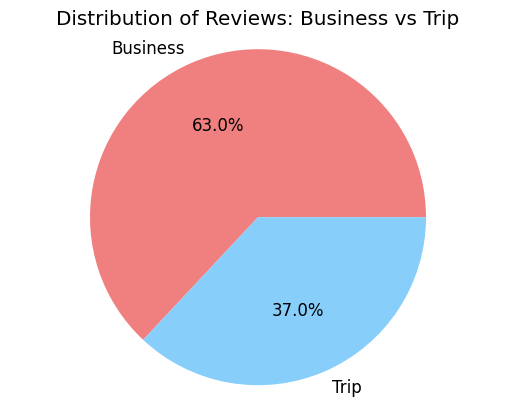

In [ ]:
business_keywords = ["business", "work", "meeting"]
trip_keywords = ["vacation", "holiday", "family trip"]

df['business_count'] = df['lemmas'].apply(lambda x: sum(1 for keyword in business_keywords if keyword in x))
df['trip_count'] = df['lemmas'].apply(lambda x: sum(1 for keyword in trip_keywords if keyword in x))

# Calculate percentages
total_reviews = len(df)
business_per = (df['business_count'].sum() / total_reviews) * 100
trip_per = (df['trip_count'].sum() / total_reviews) * 100

labels = ['Business', 'Trip']
sizes = [business_per,trip_per]
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%0.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Distribution of Reviews: Business vs Trip')

> We see that majority of people tend to book the hotel for business purposes.

# Vadar Sentiment Analysis
**VADER** stands for Valence Aware Dictionary and sentiment Reasoner. It is a rule-based sentiment analyzer.It consists of a list of lexical features (e.g. words) which are generally labeled as per their semantic orientation as positive or negative.

In [ ]:
data=df.copy()
data.drop(columns={'Review','Clean_Reviews','stemmed'},inplace=True)

In [ ]:
data.sample(3)

,lemmas,business_count,trip_count
11331,great little lovely little staff pleasant brea...,0,0
16234,nice good location got day stay hongkong staye...,0,0
5701,great place mediocre attitude stayed wife yr o...,0,0


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# analyser = SentimentIntensityAnalyzer()

In [ ]:
import nltk
nltk.download('vader_lexicon')

pos_words_for_pos_group = []
neg_words_for_pos_group = []
net_words_for_pos_group = []

def classify_words(text):
    analyzer = SentimentIntensityAnalyzer()
    words = text.split()
    for word in words:
        score = analyzer.polarity_scores(word)['compound']
        if score > 0.5:
            pos_words_for_pos_group.append(word)
        elif ((score < 0.5) & (score > -0.5)):
            net_words_for_pos_group.append(word)
        else:
          neg_words_for_pos_group.append(word)


data["lemmas"].apply(lambda x: classify_words(x))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Define a function to plot word cloud
pw = set(pos_words_for_pos_group)
pos_words_for_wc = ' '.join(pw)

neu_word = set(net_words_for_pos_group)
neu_words_for_wc = ' '.join(neu_word)

nw = set(neg_words_for_pos_group)
neg_words_for_wc = ' '.join(nw)

def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate Positive WordCloud
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=500,
                     colormap='Set1',stopwords=my_stop_words).generate(pos_words_for_wc  )
plot_cloud(wordcloud)

# Generate Negative Word Cloud
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=500,
                     colormap='Set1',stopwords=my_stop_words).generate(neg_words_for_wc)
plot_cloud(wordcloud)

# Generate Neutral Word Cloud
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=500,
                     colormap='Set1',stopwords=my_stop_words).generate(neu_words_for_wc)
plot_cloud(wordcloud)

In [ ]:
dt=pd.DataFrame({'lemmas':data.lemmas,'rating':reviews.Rating})
dt.head()

,lemmas,rating
0,nice expensive parking got good deal stay anni...,4
1,ok nothing special charge diamond member hilto...,2
2,nice room not experience monaco seattle good n...,3
3,unique great stay wonderful time monaco locati...,5
4,great stay great stay went seahawk game awesom...,5


In [ ]:
dt['sentiment']=dt['rating'].map({4:'positive',5:'positive',
                                 3:'neutral',
                                 2:'negative',1:'negative'})
dt.sample(3)

,lemmas,rating,sentiment
20264,ok right deal got good deal combination flight...,3,neutral
8045,good good location spent night charlesmark wee...,4,positive
14013,great room modern run block beach quiet reside...,4,positive


In [ ]:
dt['sentiment'].value_counts()

positive    15093
negative     3214
neutral      2184
Name: sentiment, dtype: int64

In [ ]:
dt.drop(columns={'rating'},inplace=True)

In [ ]:
import numpy as np

dt['sentiment'] = np.where(dt['sentiment'] == 'positive', 1,
                           np.where(dt['sentiment'] == 'neutral', 2, 3))


In [ ]:
dt.sample(3)

,lemmas,sentiment
17619,nice quirky princess diagonal mar barcelonathe...,1
14162,excellent bargain value price not beat staff g...,1
19496,beach beautiful food terrible husband excited ...,3




```
# This is formatted as code
```

# Using -- Count-Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()
senti=cv.fit_transform(dt.lemmas)
feature_names=cv.get_feature_names_out()
print(feature_names[100:200])

['aboutif' 'aboutit' 'aboutkeep' 'aboutlastly' 'aboutmaid' 'aboutmy'
 'aboutour' 'aboutplease' 'aboutpros' 'aboutrestaurant' 'aboutso'
 'abouttaxi' 'aboutthe' 'aboutthere' 'aboutthis' 'aboutwas' 'aboutwe'
 'aboutwhen' 'aboutwithin' 'aboveaverage' 'aboveavg' 'abovebelow'
 'abovecheckin' 'aboveevening' 'abovefinnally' 'aboveground' 'abovehotel'
 'abovementioned' 'abovepar' 'abovethe' 'abraham' 'abrahan' 'abrasion'
 'abrasive' 'abreast' 'abroad' 'abrupt' 'abruptly' 'abruptness' 'abruzzo'
 'absaloutly' 'absence' 'absencewould' 'absense' 'absent' 'absentee'
 'absentminded' 'absentmindedly' 'absentwhen' 'absofreakinlutely'
 'absoloutely' 'absolubt' 'absoluetly' 'absolultely' 'absolulty' 'absolut'
 'absolutaley' 'absolutaly' 'absolutbacardi' 'absolute' 'absoluteall'
 'absoluteley' 'absolutely' 'absolutelyloved' 'absolutey' 'absolutley'
 'absolutly' 'absorb' 'absorbant' 'absorbed' 'absorber' 'absorbing'
 'absorption' 'absortion' 'absouloutly' 'absoulte' 'absoultely'
 'absoultley' 'absoultly' '

In [ ]:
print(cv.vocabulary_)

{'nice': 41278, 'expensive': 22212, 'parking': 44989, 'got': 26960, 'good': 26743, 'deal': 16239, 'stay': 59012, 'anniversary': 2568, 'arrived': 3688, 'late': 34802, 'evening': 21465, 'took': 63494, 'advice': 929, 'previous': 48011, 'review': 52145, 'valet': 66765, 'check': 11365, 'quick': 49280, 'easy': 19631, 'little': 35770, 'disappointed': 17794, 'nonexistent': 41899, 'view': 67271, 'clean': 12285, 'size': 56493, 'bed': 6335, 'comfortable': 13174, 'woke': 69658, 'stiff': 59292, 'neck': 40898, 'high': 29200, 'pillow': 46272, 'not': 42116, 'soundproof': 57689, 'like': 35506, 'heard': 28644, 'music': 40459, 'night': 41443, 'morning': 39919, 'loud': 36395, 'bang': 5259, 'door': 18642, 'opening': 43401, 'closing': 12587, 'hear': 28641, 'people': 45600, 'talking': 61175, 'hallway': 28077, 'maybe': 37995, 'noisy': 41794, 'neighbor': 41051, 'aveda': 4493, 'bath': 5755, 'product': 48456, 'goldfish': 26698, 'touch': 63702, 'taken': 61138, 'advantage': 879, 'staying': 59066, 'longer': 36229, 

In [ ]:
print(senti.toarray()[100:400])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(senti.toarray()[:5])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
dt.lemmas[162]

'nice small bathroom stayed night returned night leaving seattle king size actually large bathroom small time sink tiny second time toiletry overall clean nice bed flatscreen tv road noise street parking night privilege good location'

In [ ]:
senti[162].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
import numpy as np
np.set_printoptions(threshold=np.inf)

In [ ]:
print(senti[0].toarray())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

## <span style='color:purple'>Logistic Regression<span>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
x1=senti
y1=dt['sentiment']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
x_train_resampled, y_train_resampled = oversampler.fit_resample(x_train, y_train)

In [ ]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(x_train_resampled, y_train_resampled)
y_pred = logreg_model.predict(x_test)
lros_count_report=classification_report(y_test,y_pred)
print(lros_count_report)

              precision    recall  f1-score   support

           1       0.92      0.90      0.91      3042
           2       0.32      0.36      0.34       432
           3       0.73      0.74      0.74       625

    accuracy                           0.82      4099
   macro avg       0.66      0.67      0.66      4099
weighted avg       0.83      0.82      0.83      4099



In [ ]:
print("Min value in x_train_resampled:", x_train_resampled.min())
print("Min value in x_test:", x_test.min())


Min value in x_train_resampled: 0
Min value in x_test: 0


In [ ]:
lr_count_report = {'result': {'precision': 0.33, 'recall': 0.26, 'f1-score': 0.34}}

#### <span style='color:red'> Interpretation of LR_cv:<span>

- By looking at support we can see that the data is imbalanced and the f1-score is the HM of precision and recall (gives more weight to the lower class). Since the value of f1-score(0.34) is not higher(<1) which indicates models performance was relatively low.

## <span style='color:purple'> Naive Bayes <span>

- MNB is suitable for discrete data, particularly when dealing with features that represent counts or frequencies. It is commonly used in text classification problems where the features are the frequencies of words or other discrete data points.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb_os=MultinomialNB()
mnb_os.fit(x_train_resampled,y_train_resampled)
y_pred = mnb_os.predict(x_test)
nbos_count_report=classification_report(y_test,y_pred)
print(nbos_count_report)

              precision    recall  f1-score   support

           1       0.94      0.89      0.91      3042
           2       0.36      0.48      0.41       432
           3       0.72      0.74      0.73       625

    accuracy                           0.82      4099
   macro avg       0.67      0.70      0.68      4099
weighted avg       0.85      0.82      0.83      4099



In [ ]:
nb_count_report = {'result': {'precision': 0.35, 'recall': 0.48, 'f1-score': 0.41}}

In [ ]:
# from sklearn.svm import SVC

# svm=SVC()
# svm.fit(x_train_resampled,y_train_resampled)
# y_pred=svm.predict(x_test)
# svm_count_report=classification_report(y_test,y_pred)
# print(svm_count_report)

# Using-TF-IDF

In [ ]:
dt = pd.DataFrame({"lemmas":df.lemmas, "rating" :reviews.Rating})
dt.head()

,lemmas,rating
0,nice expensive parking got good deal stay anni...,4
1,ok nothing special charge diamond member hilto...,2
2,nice room not experience monaco seattle good n...,3
3,unique great stay wonderful time monaco locati...,5
4,great stay great stay went seahawk game awesom...,5


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer=TfidfVectorizer(max_features=1000,max_df=0.5,smooth_idf=True)
doc_vec=vectorizer.fit_transform(dt.lemmas)
names_features=vectorizer.get_feature_names_out()
dense=doc_vec.todense()
denselist=dense.tolist()
df_=pd.DataFrame(denselist,columns=names_features)

In [ ]:
df_

,able,absolutely,ac,access,accommodation,activity,actually,add,added,additional,...,worry,worse,worst,worth,write,wrong,year,yes,york,young
0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2,0.0,0.00000,0.093496,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
4,0.0,0.00000,0.000000,0.0,0.0,0.083364,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
20487,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
20488,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
20489,0.0,0.06336,0.000000,0.0,0.0,0.000000,0.032006,0.042841,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.080047,0.000000,0.0,0.038648


In [ ]:
text_to_check = dt.lemmas[209]
text_vectorized = vectorizer.transform([text_to_check])
dense_text = text_vectorized.todense()
df_text = pd.DataFrame(dense_text, columns=names_features)
df_text

,able,absolutely,ac,access,accommodation,activity,actually,add,added,additional,...,worry,worse,worst,worth,write,wrong,year,yes,york,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x2=doc_vec

In [ ]:
dt['sentiment'] = pd.cut(dt['rating'], bins=[0, 2, 3, 5], labels=['negative', 'neutral', 'positive'])
dt.head()
y2 = dt["sentiment"]

## <span style='color:purple'>  Logistic Regression <span>

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
x_train_resampled, y_train_resampled = oversampler.fit_resample(x_train, y_train)

In [ ]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(x_train_resampled, y_train_resampled)
y_pred = logreg_model.predict(x_test)
lros_tfidf_report=classification_report(y_test,y_pred)
print(lros_tfidf_report)

              precision    recall  f1-score   support

           1       0.92      0.90      0.91      3042
           2       0.32      0.36      0.34       432
           3       0.73      0.74      0.74       625

    accuracy                           0.82      4099
   macro avg       0.66      0.67      0.66      4099
weighted avg       0.83      0.82      0.83      4099



In [ ]:
lr_tfidf_report = {'result': {'precision': 0.33, 'recall': 0.36, 'f1-score': 0.34}}

## <span style='color:purple'> Naive Bayes <span>

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
x_train_resampled, y_train_resampled = oversampler.fit_resample(x_train, y_train)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb_os=MultinomialNB()
mnb_os.fit(x_train_resampled,y_train_resampled)
y_pred = mnb_os.predict(x_test)
nbos_tfidf_report=classification_report(y_test,y_pred)
print(nbos_tfidf_report)

              precision    recall  f1-score   support

           1       0.94      0.89      0.91      3042
           2       0.36      0.48      0.41       432
           3       0.72      0.74      0.73       625

    accuracy                           0.82      4099
   macro avg       0.67      0.70      0.68      4099
weighted avg       0.85      0.82      0.83      4099



In [ ]:
nb_tfidf_report = {'result': {'precision': 0.35, 'recall': 0.48, 'f1-score': 0.41}}

## <span style='color:purple'> SVM <span>

In [ ]:
from sklearn.svm import SVC

svm=SVC()
svm.fit(x_train_resampled,y_train_resampled)
y_pred=svm.predict(x_test)
svm_tfidf_report=classification_report(y_test,y_pred)
print(svm_tfidf_report)

              precision    recall  f1-score   support

           1       0.91      0.93      0.92      3042
           2       0.42      0.36      0.38       432
           3       0.77      0.75      0.76       625

    accuracy                           0.85      4099
   macro avg       0.70      0.68      0.69      4099
weighted avg       0.84      0.85      0.84      4099



In [ ]:
svm_tfidf_report = {'result': {'precision': 0.41, 'recall': 0.36, 'f1-score': 0.38}}

# Using - Word2Vec

In [ ]:
dt = df.copy()
dt.drop(columns={"Review","Clean_Reviews","stemmed"}, inplace=True, axis=0)
dt.head()

,lemmas,business_count,trip_count
0,nice expensive parking got good deal stay anni...,0,0
1,ok nothing special charge diamond member hilto...,1,0
2,nice room not experience monaco seattle good n...,1,0
3,unique great stay wonderful time monaco locati...,1,0
4,great stay great stay went seahawk game awesom...,1,0


In [ ]:
dt=pd.DataFrame({'lemmas':dt.lemmas,'rating':reviews.Rating})
dt.head()

,lemmas,rating
0,nice expensive parking got good deal stay anni...,4
1,ok nothing special charge diamond member hilto...,2
2,nice room not experience monaco seattle good n...,3
3,unique great stay wonderful time monaco locati...,5
4,great stay great stay went seahawk game awesom...,5


In [ ]:
# Word2Vec
import gensim
from gensim.utils import simple_preprocess

In [ ]:
story = []
for i in dt["lemmas"]:
  story.append(simple_preprocess(i))

In [ ]:
# print(len(story))   # in story there are 20491 sentences and every sentences are tokenize

story[0]

['nice',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'anniversary',
 'arrived',
 'late',
 'evening',
 'took',
 'advice',
 'previous',
 'review',
 'valet',
 'parking',
 'check',
 'quick',
 'easy',
 'little',
 'disappointed',
 'nonexistent',
 'view',
 'clean',
 'nice',
 'size',
 'bed',
 'comfortable',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillow',
 'not',
 'soundproof',
 'like',
 'heard',
 'music',
 'night',
 'morning',
 'loud',
 'bang',
 'door',
 'opening',
 'closing',
 'hear',
 'people',
 'talking',
 'hallway',
 'maybe',
 'noisy',
 'neighbor',
 'aveda',
 'bath',
 'product',
 'nice',
 'not',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantage',
 'staying',
 'longer',
 'location',
 'great',
 'walking',
 'distance',
 'shopping',
 'overall',
 'nice',
 'experience',
 'pay',
 'parking',
 'night']

In [ ]:
embedding_size = 100
cbow_model = gensim.models.Word2Vec(
    window = 10,                # it means when we predict the centre word how much words will we keep on other side
    min_count = 2,              # we will take only those words min count is more than or equal to 2
    vector_size= embedding_size,            # how many vec are needed in output
    sg = 0
)

In [ ]:
cbow_model.build_vocab(story)

In [ ]:
cbow_model.train(story, total_examples=cbow_model.corpus_count, epochs=10)

(17384575, 19390580)

In [ ]:
cbow_model.wv.get_normed_vectors().shape

In [ ]:
cbow_model.wv.most_similar("dirty")

In [ ]:
cbow_model.wv.most_similar(positive=["room", "dirty", "disappoint", "suffered", "noise", "unsanitary"], negative=[], topn=10)

In [ ]:
a = cbow_model.wv.get_vector("employee") + cbow_model.wv.get_vector("polite") + cbow_model.wv.get_vector("cooperative")
cbow_model.wv.cosine_similarities(a, [cbow_model.wv.get_vector("frontdesk")])

In [ ]:
cbow_model.wv.most_similar(positive=["valuable","stole","belonging","purse","lost"], negative=[], topn=10)

In [ ]:
cbow_model.wv.most_similar(positive=["valuable","stole","belonging","purse",], negative=["lost"], topn=10)

In [ ]:
cbow_model.wv.most_similar(positive=["disgusting","service","customer","horrible"], negative=[], topn=10)

In [ ]:
b = cbow_model.wv.get_vector("horrible") + cbow_model.wv.get_vector("customer") + cbow_model.wv.get_vector("service")
cbow_model.wv.cosine_similarities(b, [cbow_model.wv.get_vector("management")])

In [ ]:
cbow_model.wv.similarity("clean", "room")

In [ ]:
cbow_model.wv.get_normed_vectors().shape #26415 unique words

(26312, 100)

In [ ]:
#model.wv.get_normed_vectors()
y=cbow_model.wv.index_to_key
# y

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=3)

In [ ]:
p=pca.fit_transform(cbow_model.wv.get_normed_vectors())
p.shape

(26312, 3)

In [ ]:
import plotly.express as px
fig=px.scatter_3d(p[:100],x=0,y=1,z=2,color=y[:100])

In [ ]:
fig.show()

In [ ]:
def avg_word2vec (doc):
    doc=[word for word in doc.split() if word in cbow_model.wv.index_to_key]
    return np.mean([cbow_model.wv[word] for word in doc],axis=0)

In [ ]:
# avg_word2vec(dt['lemmas'].values[0]) #for first review to vector

In [ ]:
from tqdm import tqdm

In [ ]:
x_wv=[]
for doc in tqdm(dt['lemmas'].values):
    x_wv.append(avg_word2vec(doc))

100%|██████████| 20491/20491 [02:43<00:00, 124.96it/s]


In [ ]:
x_wv=np.array(x_wv)

In [ ]:
x_wv.shape

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import RandomOverSampler

dt['Sentiment'] = pd.cut(dt['rating'], bins=[0, 2, 3, 5], labels=['negative', 'neutral', 'positive'])

y_wv = dt['Sentiment']

x_train,x_test,y_train,y_test=train_test_split(x_wv,y_wv,test_size=0.2,random_state=42)

oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
x_train_resampled, y_train_resampled = oversampler.fit_resample(x_train, y_train)

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(x_train_resampled, y_train_resampled)

y_pred = naive_bayes_model.predict(x_test)

# Evaluation Metrics
naive_accuracy = accuracy_score(y_test, y_pred)
naive_precision = precision_score(y_test, y_pred, average='weighted')
naive_recall = recall_score(y_test, y_pred, average='weighted')
naive_f1 = f1_score(y_test, y_pred, average='weighted')

# Print Metrics
print(f"Accuracy: {naive_accuracy}")
print(f"Precision: {naive_precision}")
print(f"Recall: {naive_recall}")
print(f"F1 Score: {naive_f1}")

## <span style='color:purple'> Logistic Regression  <span>

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
x_train_resampled, y_train_resampled = oversampler.fit_resample(x_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(x_train_resampled, y_train_resampled)
y_pred = logreg_model.predict(x_test)
lr_wv_report=classification_report(y_test,y_pred)
print(lr_wv_report)

In [ ]:
lr_wv_report = {'result': {'precision': 0.27, 'recall': 0.78, 'f1-score': 0.40}}

## <span style='color:purple'> Naive Bayes <span>

- For text data analysis with Word2Vec vectors, the multinomial Naive Bayes model is not suitable because it is designed for count-based features, such as the term frequencies in text data. Word2Vec vectors are continuous-valued and represent semantic information, making them more appropriate for models that can handle continuous features

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb_os=GaussianNB()
gnb_os.fit(x_train_resampled,y_train_resampled)
y_pred = gnb_os.predict(x_test)
nb_wv_report=classification_report(y_test,y_pred)
print(nb_wv_report)

In [ ]:
nb_wv_report = {'result': {'precision': 0.23, 'recall': 0.57, 'f1-score': 0.33}}

## <span style='color:purple'> Support Vector Machine <span>

In [ ]:
from sklearn.svm import SVC

svm=SVC()
svm.fit(x_train_resampled,y_train_resampled)
y_pred=svm.predict(x_test)
svm_wv_report=classification_report(y_test,y_pred)
print(svm_wv_report)

In [ ]:
svm_wv_report = {'result': {'precision': 0.29, 'recall': 0.72, 'f1-score': 0.41}}

In [ ]:
svm_count_report = {'result': {'precision':'NA' , 'recall':'NA' , 'f1-score':'NA' }}

In [ ]:
data = {
    'Model': ['Logistic Regression', 'Logistic Regression', 'Logistic Regression', 'SVM', 'SVM', 'SVM', 'Naive Bayes', 'Naive Bayes', 'Naive Bayes'],
    'Vectorizer': [ 'Count Vectorizer','TF-IDF', 'Word2Vec', 'Count Vectorizer','TF-IDF', 'Word2Vec','Count Vectorizer','TF-IDF', 'Word2Vec'],
    'Precision': [lr_count_report['result']['precision'], lr_tfidf_report['result']['precision'], lr_wv_report['result']['precision'],
                  svm_count_report['result']['precision'], svm_tfidf_report['result']['precision'], svm_wv_report['result']['precision'],
                  nb_count_report['result']['precision'], nb_tfidf_report['result']['precision'], nb_wv_report['result']['precision']],
    'Recall': [lr_count_report['result']['recall'], lr_tfidf_report['result']['recall'], lr_wv_report['result']['recall'],
               svm_count_report['result']['recall'], svm_tfidf_report['result']['recall'], svm_wv_report['result']['recall'],
               nb_count_report['result']['recall'], nb_tfidf_report['result']['recall'], nb_wv_report['result']['recall']],
    'F1-Score': [lr_count_report['result']['f1-score'], lr_tfidf_report['result']['f1-score'], lr_wv_report['result']['f1-score'],
                 svm_count_report['result']['f1-score'], svm_tfidf_report['result']['f1-score'], svm_wv_report['result']['f1-score'],
                 nb_count_report['result']['f1-score'], nb_tfidf_report['result']['f1-score'], nb_wv_report['result']['f1-score']]
}

df_results = pd.DataFrame(data)

In [ ]:
df_results

> based on the F1-scores for the lower class, TF-IDF , CV  for Naive Bayes, Word2Vec for SVM seems to perform relatively well

### sample testing wrt word2vec

In [ ]:
word = avg_word2vec("this hotel is good!")
naive_bayes_model.predict(word.reshape(1,-1))

In [ ]:
word = avg_word2vec("this hotel is bad")
naive_bayes_model.predict(word.reshape(1,-1))

In [ ]:
word = avg_word2vec("this hotel is good!")
naive_bayes_model.predict(word.reshape(1,-1))


In [ ]:
sent = avg_word2vec("room were filthy and foods were unhygienic")
naive_bayes_model.predict(sent.reshape(1,-1))

In [ ]:
sent = avg_word2vec("the hotel was terrible, food were horrible, toilets were not cleaned")
naive_bayes_model.predict(sent.reshape(1,-1))

In [ ]:
# index no 3 of datasets (though it is a neutral review as per our but it is showing negative)
sentence = avg_word2vec("nice room not experience monaco seattle good nt levelpositives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed separate wakeup call concierge busy hard touch nt provide guidance special requeststv hard use ipod sound dock suite non functioning decided book mediterranean suite night weekend stay choice rest party filled comparison w spent night larger square footage great soaking tub whirlpool jet nice showerbefore stay arrange car service price tip reasonable driver waiting arrivalcheckin easy downside picked person jacuzi tub bath accessory salt bubble bath nt stay night got checked voucher bottle champagne nice gesture fish waiting impression huge open space felt big tv far away bed chore change channel ipod dock broken disappointingin morning way asked desk check thermostat said degree warm try cover face night bright blue light kept got night drop desk called maintainence came look thermostat told play setting happy digital box wo nt work asked wakeup morning nt happen called later nap wakeup forgot wakeup morning yep forgottenthe bathroom facility great surprised sold whirlpool bath tub nt bath amenity great relax water jet going")
naive_bayes_model.predict(sentence.reshape(1,-1))

In [ ]:
# index no. 4 of datasets (it is a positive reviews)
a = "unique great stay wonderful time monaco location excellent short stroll main downtown shopping area pet friendly showed sign animal hair smell monaco suite sleeping area big striped curtain pulled closed nice touch felt cosy goldfish named brandi enjoyed nt partake free wine coffeetea service lobby thought great feature great staff friendly free wireless internet worked suite laptop decor lovely eclectic mix patten color palatte animal print bathrobe feel like rock star nice nt look like sterile chain personality excellent stay"
line = avg_word2vec(a)
naive_bayes_model.predict(line.reshape(1,-1))

array(['positive'], dtype='<U8')

array(['positive'], dtype='<U8')